In [45]:
from main import *
import matplotlib.pyplot as plt

Wczytanie danych:

In [46]:
df = pd.read_excel("data/example_data.xlsx")
event_list = load_event_list(df)
df

,event_id,city,start_date,end_date,visitors,ingredient_cost,parking_cost
0,0,Kraków,2022-07-04,2022-07-06,"10000,11000,9000",5.34,"300,200,100"
1,1,Warszawa,2022-07-05,2022-07-07,"12000,30000,25000",4.94,"300,200,100"
2,2,Gdynia,2022-07-06,2022-07-08,"8000,10000,13000",5.50,"300,200,100"
3,3,Szczecin,2022-07-07,2022-07-09,"9000,8000,7000",4.89,"300,200,100"
4,4,Poznań,2022-07-08,2022-07-10,"13000,12500,10000",5.40,"300,200,100"
5,5,Zakopane,2022-07-09,2022-07-11,"7000,9000,10000",5.12,"250,200,100"
6,6,Kraków,2022-07-10,2022-07-11,"12000,30000",5.05,"200,100"
7,7,Łódź,2022-07-11,2022-07-12,"15000,20000",4.92,"500,300"
8,8,Bydgoszcz,2022-07-15,2022-07-17,"10000,8000,12000",4.89,"300,250,200"
9,9,Toruń,2022-07-13,2022-07-14,"3000,7000",4.56,"300,200"


Wczytanie odległości między miastami:

In [47]:
# distances = driving_distances(list(df['city'].unique()))
with open('distances.json', 'r') as fp:
    distances = json.load(fp)

Przykładowe rozwiązanie:

In [48]:
start_date = datetime(2022, 7, 4)
end_date = datetime(2022, 7, 8)

solution_list = []
solution_list.append(SolutionElement(0, 2, 6000, **event_list[0].attributes))
solution_list.append(SolutionElement(1, 1, 2400, **event_list[1].attributes))
solution_list.append(SolutionElement(2, 1, 1600, **event_list[2].attributes))
solution_list.append(SolutionElement(3, 2, 5000, **event_list[3].attributes))

solution = Solution(solution_list, distances, start_date, end_date, 'Kraków')
for element in solution_list:
    print(element)

event_id = 0, city = Kraków, stay_duration = 2, ingredients_bought = 6000
event_id = 1, city = Warszawa, stay_duration = 1, ingredients_bought = 2400
event_id = 2, city = Gdynia, stay_duration = 1, ingredients_bought = 1600
event_id = 3, city = Szczecin, stay_duration = 2, ingredients_bought = 5000


Całkowity zysk dla powyższego rozwiązania:

In [49]:
print(f"Całkowity zysk: {solution.overall_profit()}")

Całkowity zysk: 14788.055


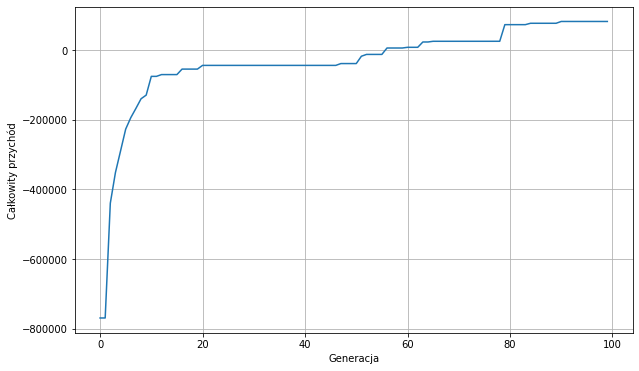

In [50]:
crossover_methods = ["one_point", "two_point"]
mutation_methods = ["uniform", "swap", "event_change"]
population_size = 100
generations = 100
parents_percent = 15
mutation_chance = 0.15

problem_settings = {
    'start_date': datetime(2022, 7, 4),
    'end_date': datetime(2022, 7, 15),
    'start_city': "Kraków",
    'product_price': 9.0,
    'max_capacity': 100000,
    'starting_ingredients': 500,
    'visitors_coeff': 0.2,
    'distance_coeff': 50 / 100000,
    'capacity_punishment_coeff': 18.0,
    'duration_punishment_coeff': 5000
}

best_solution, best_solutions_in_generations = genetic_algorithm(population_size, generations, crossover_methods, mutation_methods, mutation_chance, parents_percent, **problem_settings)
plt.figure(figsize=(10, 6))
plt.plot(best_solutions_in_generations)
plt.grid()
plt.ylabel("Całkowity przychód")
plt.xlabel("Generacja")
plt.show()

In [51]:
print(f"Przychód z najlepszego rozwiązania: {best_solution.overall_profit()}")
print(f"\nNajlepsze rozwiązanie:")
for i, el in enumerate(best_solution.solution_list):
    print(f"{i + 1}. {el}")

Przychód z najlepszego rozwiązania: 81804.24734999999

Najlepsze rozwiązanie:
1. event_id = 16, city = Lubin, stay_duration = 4, ingredients_bought = 17339
2. event_id = 12, city = Katowice, stay_duration = 5, ingredients_bought = 7673
3. event_id = 9, city = Toruń, stay_duration = 2, ingredients_bought = 5015
4. event_id = 8, city = Bydgoszcz, stay_duration = 1, ingredients_bought = 2357
5. event_id = 8, city = Bydgoszcz, stay_duration = 2, ingredients_bought = 2357


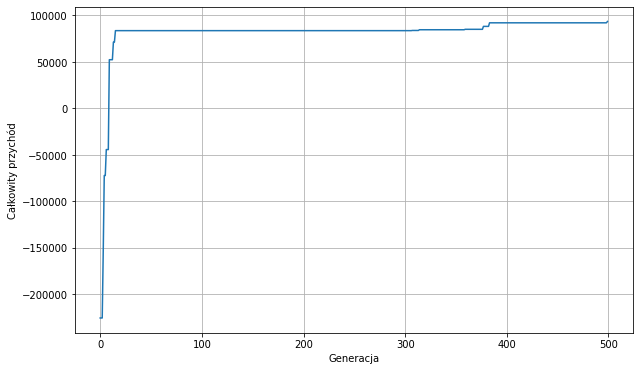

In [52]:
population_size = 200
generations = 500
parents_percent = 15
mutation_chance = 0.15

best_solution, best_solutions_in_generations = genetic_algorithm(population_size, generations, crossover_methods, mutation_methods, mutation_chance, parents_percent, **problem_settings)
plt.figure(figsize=(10, 6))
plt.plot(best_solutions_in_generations)
plt.grid()
plt.ylabel("Całkowity przychód")
plt.xlabel("Generacja")
plt.show()

In [53]:
print(f"Przychód z najlepszego rozwiązania: {best_solution.overall_profit()}")
print(f"\nNajlepsze rozwiązanie:")
for i, el in enumerate(best_solution.solution_list):
    print(f"{i + 1}. {el}")

Przychód z najlepszego rozwiązania: 93575.338

Najlepsze rozwiązanie:
1. event_id = 15, city = Zielona Góra, stay_duration = 1, ingredients_bought = 5591
2. event_id = 15, city = Zielona Góra, stay_duration = 1, ingredients_bought = 5220
3. event_id = 12, city = Katowice, stay_duration = 5, ingredients_bought = 9801
4. event_id = 7, city = Łódź, stay_duration = 2, ingredients_bought = 1481


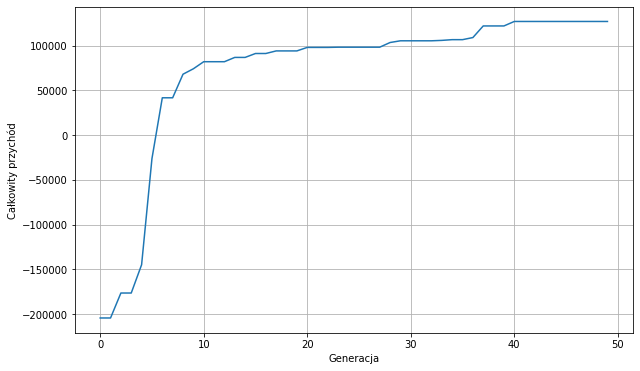

In [56]:
population_size = 1000
generations = 50
parents_percent = 20
mutation_chance = 0.10

best_solution, best_solutions_in_generations = genetic_algorithm(population_size, generations, crossover_methods, mutation_methods, mutation_chance, parents_percent, **problem_settings)
plt.figure(figsize=(10, 6))
plt.plot(best_solutions_in_generations)
plt.grid()
plt.ylabel("Całkowity przychód")
plt.xlabel("Generacja")
plt.show()

In [57]:
print(f"Przychód z najlepszego rozwiązania: {best_solution.overall_profit()}")
print(f"\nNajlepsze rozwiązanie:")
for i, el in enumerate(best_solution.solution_list):
    print(f"{i + 1}. {el}")

Przychód z najlepszego rozwiązania: 127050.73140000002

Najlepsze rozwiązanie:
1. event_id = 1, city = Warszawa, stay_duration = 3, ingredients_bought = 13530
2. event_id = 9, city = Toruń, stay_duration = 1, ingredients_bought = 12758
3. event_id = 12, city = Katowice, stay_duration = 5, ingredients_bought = 4135
4. event_id = 20, city = Rzeszów, stay_duration = 1, ingredients_bought = 857
